# Introduction

/home/kokeeffe/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score) = (50, 37.0)
(episode, score) = (100, 38.0)
(episode, score) = (150, 13.0)
(episode, score) = (200, 16.0)
(episode, score) = (250, 13.0)
(episode, score) = (300, 42.0)
(episode, score) = (350, 11.0)
(episode, score) = (400, 73.0)
(episode, score) = (450, 18.0)
(episode, score) = (500, 24.0)
(episode, score) = (550, 18.0)
(episode, score) = (600, 12.0)
(episode, score) = (650, 30.0)
(episode, score) = (700, 21.0)
(episode, score) = (750, 13.0)
(episode, score) = (800, 15.0)
(episode, score) = (850, 10.0)
(episode, score) = (900, 38.0)
(episode, score) = (950, 25.0)
(episode, score) = (1000, 14.0)
(episode, score) = (1050, 12.0)
(episode, score) = (1100, 11.0)
(episode, score) = (1150, 16.0)
(episode, score) = (1200, 63.0)
(episode, score) = (1250, 21.0)
(episode, score) = (1300, 12.0)
(episode, score) = (1350, 46.0)
(episode, score) = (1400, 21.0)
(episode, score) = (1450, 

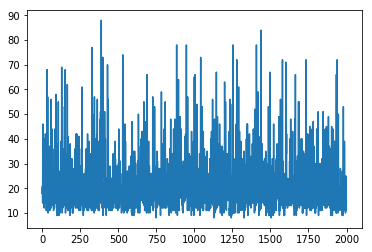

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gym
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
import keras.optimizers 
from keras import backend as K
from agent import Agent
%matplotlib inline


#Env
env = gym.make('CartPole-v0')
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n

#Agent
input_dim, output_dim = num_states, num_actions
lr, gamma, tau, clipnorm, verbose = 10**(-3), 0.99, 0.01, True, False
agent = Agent(input_dim, output_dim, lr, gamma, tau, clipnorm, verbose)

#Train
EPISODES = 2000
scores = []
for e in range(1,EPISODES+1):
    state = env.reset()
    state = np.reshape(state, [1, num_states])
    reward_sum = 0
    done = False
    while not done:
        # env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        next_state = np.reshape(next_state, [1, num_states])
        agent.remember(state[0], action, reward, next_state[0], done)
        state = next_state
    agent.learn()
    scores.append(reward_sum)
    if e % 50 == 0:
        print '(episode, score) = ' + str((e,reward_sum))
plt.plot(scores)

### Roughwork